In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import re

In [149]:
df = pd.read_csv('files/speech_data_english.csv')
df = df.replace(float('nan'), None)
df.head()

,Subject,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 51,Word 52,Word 53,Word 54,Word 55,Word 56,Word 57,Word 58,Word 59,Word 60
0,Original,lost,bolt,there,filed,beings,expect,bread,bowls,tired,...,nerve,spread,cruelty,flies,trap,sings,from,stale,quite,dairy
1,5.1.1,lost,board,three,field,beans,accept,braid,balls,tat,...,nerve,spread,cruetly,flies,trap,sings,from,stale,quite,dairy
2,5.2.1,lost,bolt,there,field,beings,expect,bread,bowls,tried,...,nerve,spread,cruelty,fiels,trap,sings,form,stale,quiet,diary
3,5.3.1,lost,board,there,field,being,respect,bread,bowls,tired,...,nerve,spread,cutely,flies,trap,sings,from,stale,quite,diary
4,5.4.1,lost,bolt,there,field,begins,except,bread,bowls,tried,...,nerves,spread,cruel,files,trap,sings,from,slate,quite,diary


In [150]:
# Preprocessing
df = df.applymap(lambda s: s.strip().lower() if type(s) == str else s)
df.head()

,Subject,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 51,Word 52,Word 53,Word 54,Word 55,Word 56,Word 57,Word 58,Word 59,Word 60
0,original,lost,bolt,there,filed,beings,expect,bread,bowls,tired,...,nerve,spread,cruelty,flies,trap,sings,from,stale,quite,dairy
1,5.1.1,lost,board,three,field,beans,accept,braid,balls,tat,...,nerve,spread,cruetly,flies,trap,sings,from,stale,quite,dairy
2,5.2.1,lost,bolt,there,field,beings,expect,bread,bowls,tried,...,nerve,spread,cruelty,fiels,trap,sings,form,stale,quiet,diary
3,5.3.1,lost,board,there,field,being,respect,bread,bowls,tired,...,nerve,spread,cutely,flies,trap,sings,from,stale,quite,diary
4,5.4.1,lost,bolt,there,field,begins,except,bread,bowls,tried,...,nerves,spread,cruel,files,trap,sings,from,slate,quite,diary


In [165]:
def calculate_score_subject(subject):
    pronounced = df[df['Subject'] == subject].values.tolist()[0][1:]
    original = df[df['Subject'] == "original"].values.tolist()[0][1:]
    try:
        return sum([1 if x == y else 0 for x,y in zip(pronounced,original)])
    except:
        print(pronounced)

102it [00:00, 545.09it/s]


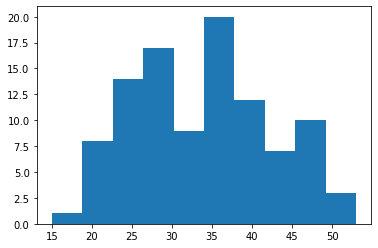

In [169]:
# Histogram
scores, subjects = [], []
for i,row in tqdm(enumerate(df.iterrows())):
    if i != 0:
        subjects.append(row[1][0])
        scores.append(calculate_score_subject(row[1][0]))

plt.hist(scores, bins=10)
plt.show()

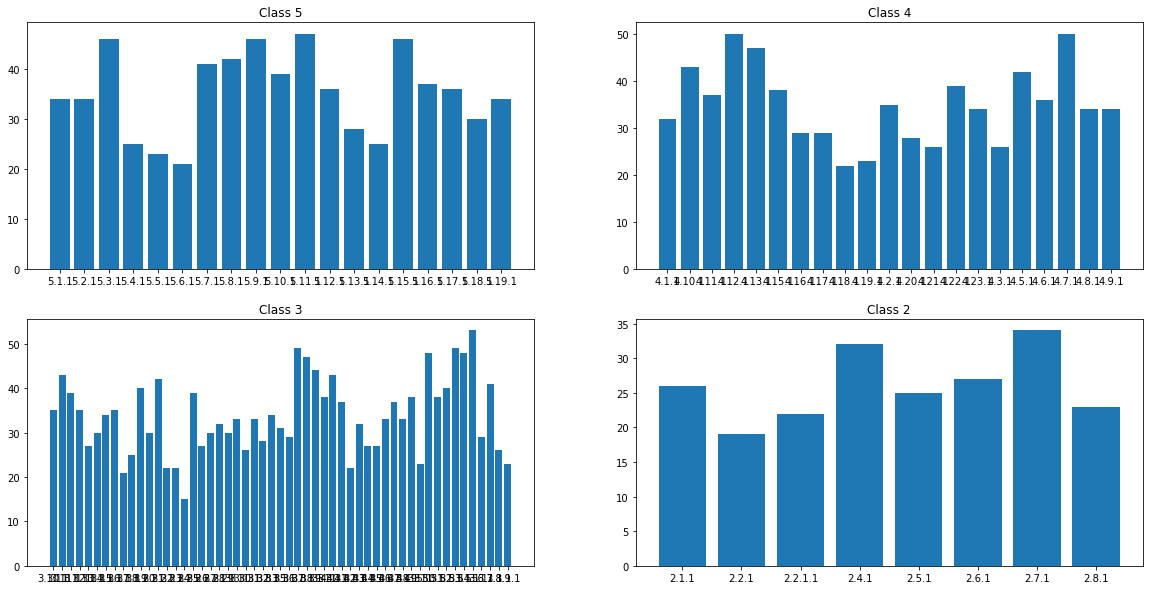

In [199]:
# Classwise bar plots
subjects_grade_5 = list(filter(lambda x: re.match(r"^5.\d*", x), subjects))
subjects_grade_4 = list(filter(lambda x: re.match(r"^4.\d*", x), subjects))
subjects_grade_3 = list(filter(lambda x: re.match(r"^3.\d*", x), subjects))
subjects_grade_2 = list(filter(lambda x: re.match(r"^2.\d*", x), subjects))

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(20,10))

ax1[0].bar(subjects_grade_5, scores[:len(subjects_grade_5)])
ax1[0].set_title('Class 5')
ax1[1].bar(subjects_grade_4, scores[len(subjects_grade_5):len(subjects_grade_5)+len(subjects_grade_4)])
ax1[1].set_title('Class 4')
ax2[0].bar(subjects_grade_3, scores[len(subjects_grade_5)+len(subjects_grade_4):len(subjects_grade_5)+len(subjects_grade_4)+len(subjects_grade_3)])
ax2[0].set_title('Class 3')
ax2[1].bar(subjects_grade_2, scores[len(subjects_grade_5)+len(subjects_grade_4)+len(subjects_grade_3):])
ax2[1].set_title('Class 2')

plt.show()